In [224]:
# required libraries
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

## **1. Data Set Selection**

In [226]:
# load the diabetes dataset
diabetes_data = load_diabetes()

In [227]:
# convert the dataset into a pandas DataFrame
df = pd.DataFrame(data = diabetes_data.data, columns = diabetes_data.feature_names)
df['target'] = diabetes_data.target

In [228]:
# View the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## **2. Data Discovery and Cleansing**

In [230]:
# First 5 rows of the dataset
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [232]:
# Statistical summary of the dataset
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [236]:
# review data types
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [239]:
# Missing data check
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

According to the examinations, there are no missing (null/NaN) values in any column in the data set. This indicates that the data set is clean and ready for analysis.

## **3. Dimension Reduction with PCA**

In [244]:
# Separate target variable (columns other than target)
X = df.drop(columns = ["target"])

In [246]:
# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [248]:
# Dimensionality reduction with PCA (5 main components)
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(X_scaled)

In [250]:
# Save new size reduced data as DataFrame
pca_columns = [f"PC{i+1}" for i in range(5)]
pca_df = pd.DataFrame(X_pca, columns = pca_columns)
pca_df

,PC1,PC2,PC3,PC4,PC5
0,0.587199,-1.946832,0.589205,-0.082816,-0.256680
1,-2.831625,1.372082,0.027930,-0.470008,-0.143269
2,0.272129,-1.634901,0.739244,-0.791492,-1.163870
3,0.049281,0.382278,-2.013032,1.373216,0.255570
4,-0.756421,0.811960,-0.057238,-0.137495,-0.133402
...,...,...,...,...,...
437,1.239525,-1.035968,0.928679,-0.656264,0.204296
438,1.264719,0.761319,-1.750191,-1.133464,-0.093975
439,-0.205206,-1.205487,0.496186,-1.353370,-0.141574
440,0.692871,0.210127,-0.868724,1.616793,0.119624


In [252]:
# Ratio of total variance explained by PCA
explained_variance = pca.explained_variance_ratio_

In [254]:
for i, variance in enumerate(explained_variance, start = 1):
    print(f"PC{i}: {variance:.2f}")

PC1: 0.40
PC2: 0.15
PC3: 0.12
PC4: 0.10
PC5: 0.07


In [256]:
print(f"Total variance explained: {sum(explained_variance):.2f}")

Total variance explained: 0.83


In [258]:
# Display first 5 rows of new dimension reduced dataset
pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,0.587199,-1.946832,0.589205,-0.082816,-0.256680
1,-2.831625,1.372082,0.027930,-0.470008,-0.143269
2,0.272129,-1.634901,0.739244,-0.791492,-1.163870
3,0.049281,0.382278,-2.013032,1.373216,0.255570
4,-0.756421,0.811960,-0.057238,-0.137495,-0.133402


## **4. Linear Regression Model with Least Squares Method**

divide the data(X) created by PCA and the target variable(y) into 80% training and 20% testing.

In [262]:
# Separate the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(pca_df, df["target"], test_size = 0.2, random_state = 42)

In [264]:
# Build and train linear regression model
model = LinearRegression() # linear regression model 
model.fit(X_train, y_train) # train the model with training data

LinearRegression()

In [266]:
# View the model's coefficients and constant term
print("Coefficients:", model.coef_) # shows the effect of PCA components on the target variable
print("Intercept:", model.intercept_) # constant term of the model; is the estimated value of the target variable when all independent variables are 0

Coefficients: [ 21.19335388 -13.65289549  12.59188219  27.41024926  -1.81529702]
Intercept: 151.18203998537038


In [268]:
# Make predictions on test data
y_pred = model.predict(X_test) # used to evaluate how well the model works

## **5. Evaluating Model Performance**

In [271]:
# Evaluate the predictions
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [273]:
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 score: {r2:.2f}")

MSE: 2879.59
MAE: 43.29
R2 score: 0.46


#### **Model Performance**
**Mse:** <code>2879.59</code> The squared deviation in the model's predictions is high. A better performance can be targeted with a lower mse.

**Mae:** <code> 43.29 </code> On average, the model predicted values deviated from the actual values by 43.29 units. This error rate must be evaluated according to the context of the data set.

**R2 score:** <code> 0.46 </code> The model can explain 46% of the variance of the target variable. This performance is average and has potential for improvement.

**Suggestions:**
- More variance can be captured by increasing the number of PCA components.
- The power of the model can be increased with more data or different features.


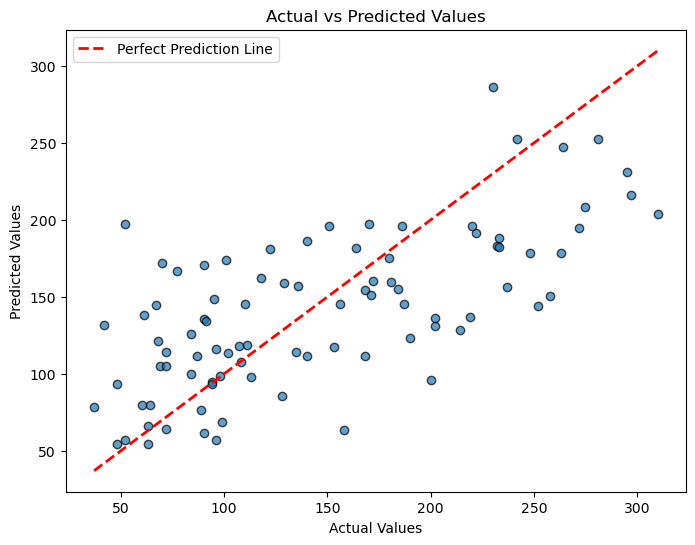

In [278]:
# Relationship between actual values and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction Line")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

The graph above shows the relationship between the values predicted by the model and the actual values.
- **Red Line (Perfect Prediction Line):** This line represents an ideal situation where the predicted values are equal to the actual values.
- **Dots:** Each dot represents the actual and predicted values ​​of a data sample.

**Comments:**
* Although model predictions are generally close to the red line, some deviations are observed.
* Especially at higher actual values (200 and above), the deviation rate of the estimates increases.
* This may indicate that the model is less sensitive to large values ​​or that further improvements could be made.

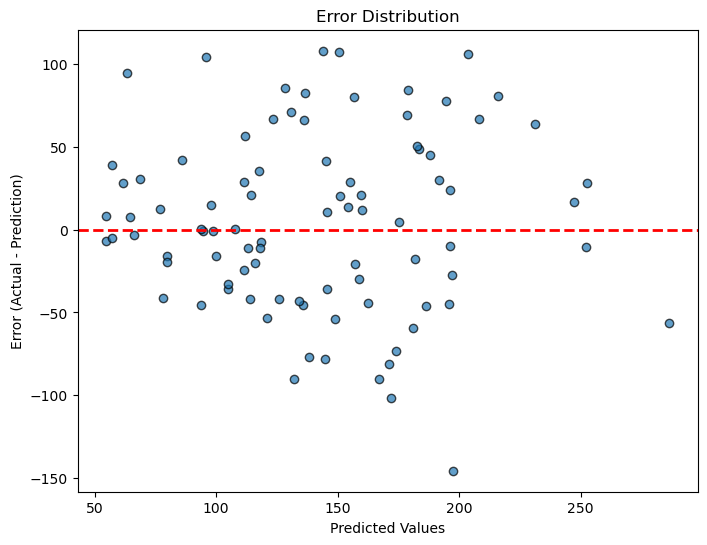

In [291]:
# Residual Plot
residuals = y_test - y_pred # calculate 

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Error (Actual - Prediction)")
plt.title("Error Distribution")
plt.show()



This graph shows the distribution of the model's prediction errors (actual value - predicted value) relative to the predicted values.
- **Red Line (0 Error Line):** The red dashed line represents the point where the error is zero. The fact that the error values are distributed symmetrically around this line indicates that the model makes balanced predictions.
- **Dots:** Each dot represents the error of a prediction.The y value of the point indicates the amount of error of the predicted value (true value - prediction).

**OBSERVATION:**
1. **Error Distribution:** Errors are generally distributed around zero (red line). This indicates that the model does not make a systematic error.However, large errors are observed at some data points
2. **Deviations in Higher Estimates:** It can be seen that the estimated values (e.g. 200 and above) spread the errors over a wider range. This shows that higher values of the model become harder to predict.
3. **Improvement Opportunities:** For data points with large errors, improving the model may be considered.
   - Training with more data.
   - Applying different models or regularization methods for faulty regions.

#### **SUMMARY**
This graph shows that the model's error distribution is generally balanced, but there are large deviations at some data points. These deviations indicate the improvement potential of the model.